In [ ]:
!pip install --upgrade tfds-nightly
!pip install --upgrade tensorflow tensorflow-datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 98.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
     

In [ ]:
import time
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# EMNIST 데이터셋 로드
ds_builder = tfds.builder("emnist/balanced")
ds_builder.download_and_prepare()
ds_info = ds_builder.info
dataset = ds_builder.as_data_source()

# Label Mapping
label_mapping = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z',
    'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't'
]

# 이미지 크기 조정 및 정규화
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # 이미지 크기를 224x224로 조정
    image = tf.image.grayscale_to_rgb(image)    # 그레이스케일 이미지를 RGB로 변환
    image = image / 255.0                       # 정규화
    return image, label

# 데이터 생성 (train, test)
X = []
y = []
for example in dataset['train']:
    X.append(example['image'])
    y.append(example['label'])

X_test = []
y_test = []
for example in dataset['test']:
    X_test.append(example['image'])
    y_test.append(example['label'])

X = np.array(X)
y = np.array(y)

X_test = np.array(X_test)
y_test = np.array(y_test)

# dataset 분할 (train:validation = 5:1), test dataset은 emnist dataset에 있는 것으로 사용
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=1/6, random_state=42)

# 데이터셋 구성 및 배치 설정
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).map(preprocess).shuffle(1000).batch(32)
valid_dataset = tf.data.Dataset.from_tensor_slices((X_valid, y_valid)).map(preprocess).batch(32)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(preprocess).batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/112800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.JL1RAC_3.1.0/emnist-train.array_record*...:   0…

Generating test examples...:   0%|          | 0/18800 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.JL1RAC_3.1.0/emnist-test.array_record*...:   0%…

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.


*Alexnet ; ImageNet 영상 데이터베이스를 기반으로 한 화상 인식 대회 'ILSVRC 2012'에서 우승한 CNN 구조 ; AlexNet은 합성곱층(conv) 총 다섯 개와 완전연결층(DNN) 세 개로 구성되어 있다. ; 맨 마지막 완전연결층은 카테고리 1000개로 분류하기 위해 softmax 활성화 함수 사용 ; 전체적으로 보면 GPU 두 개를 기반으로 한 병렬 구조인 점을 제외하면 LeNet-5와 크게 다르지 않다.



*   전반적인 코드는 LeNet-5와 동일하며 네트워크를 구현하는
부분만 다르다.
*   첫 번째 계층을 거치면서 GPU-1에서는 주로 컬러와 상관없는 정보를 추출하기 위한 커널이 학습
*   GPU-2에서는 주로 컬러와 관련된 정보를 추출하기 위한 커널이 학습된다. ; AlexNet의 합성곱층에서 사용된 활성화 함수는 ReLU



In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# AlexNet 모델 정의
def create_alexnet_model(input_shape=(224, 224, 3), num_classes=47):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(96, (11, 11), strides=4, padding='same', activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((3, 3), strides=2),
        tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3), strides=2),
        tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        tf.keras.layers.MaxPooling2D((3, 3), strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4096, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 모델 생성
model = create_alexnet_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 56, 56, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 47)                  │         192,559 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,473,903 (223.06 MB)

 Trainable params: 58,473,903 (223.06 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습

start_time = time.time()  # 학습 시작 시간

history = model.fit(train_dataset, validation_data=valid_dataset, epochs=20)

training_time = time.time() - start_time  # 학습 시간 계산

Epoch 1/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 195s 64ms/step - accuracy: 0.5941 - loss: 1.4522 - val_accuracy: 0.8385 - val_loss: 0.4640
Epoch 2/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 166s 56ms/step - accuracy: 0.8306 - loss: 0.4954 - val_accuracy: 0.8554 - val_loss: 0.4210
Epoch 3/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 202s 56ms/step - accuracy: 0.8451 - loss: 0.4465 - val_accuracy: 0.8645 - val_loss: 0.3735
Epoch 4/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 198s 55ms/step - accuracy: 0.8525 - loss: 0.4221 - val_accuracy: 0.8701 - val_loss: 0.3662
Epoch 5/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 207s 57ms/step - accuracy: 0.8556 - loss: 0.4033 - val_accuracy: 0.8680 - val_loss: 0.3721
Epoch 6/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 165s 56ms/step - accuracy: 0.8595 - loss: 0.3958 - val_accuracy: 0.8687 - val_loss: 0.3721
Epoch 7/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 199s 55ms/step - accuracy: 0.8639 - loss: 0.3863 - val_accuracy: 0.8685 - val_loss: 0.3659
Epoch 8/20
2938/2938 ━━━━━━━━━━━━━━━━━━━━ 166s 56ms/step - accuracy: 

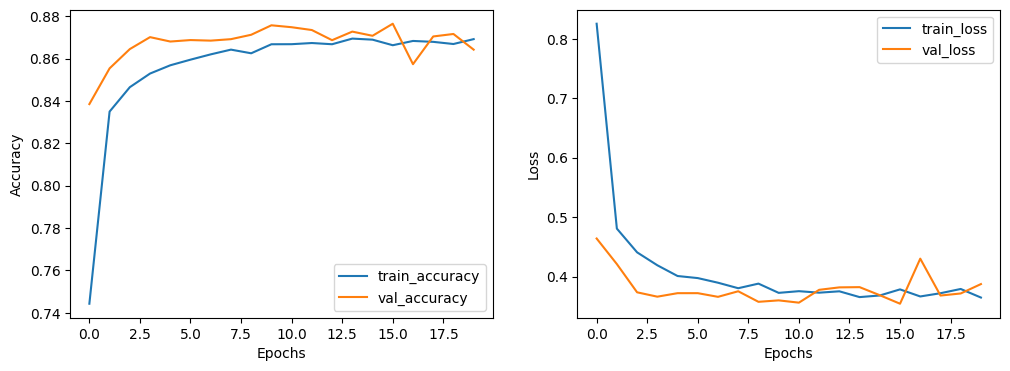

In [ ]:
# 학습 결과 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# 모델 평가

start_time = time.time()  # 추론 시작 시간
test_loss, test_accuracy = model.evaluate(test_dataset)
end_time = time.time()  # 추론 종료 시간
total_inference_time = end_time - start_time
average_inference_time = total_inference_time / len(X_test)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"훈련시간 : {training_time/60:.2f} minutes.")
print(f"평균 추론 시간: {average_inference_time:.4f} seconds.")

588/588 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.8687 - loss: 0.3891
Test Loss: 0.4020, Test Accuracy: 0.8656
훈련시간 : 73.46 minutes.
평균 추론 시간: 0.0010 seconds.
